In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from adjustText import adjust_text

data = pd.read_excel('/Users/mac/Desktop/академэссе/birth_death.xlsx', index_col=0)
data

,birth,death
region,,
Белгородская область,7.1,14.2
Брянская область,7.1,15.6
Владимирская область,6.6,16.8
Воронежская область,7.5,15.3
Ивановская область,7.5,17.3
...,...,...
Амурская область,9.1,14.8
Магаданская область,8.7,12.7
Сахалинская область,10.7,13.8


In [3]:
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(data)
# scaled_data = pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

# scaled_data

In [4]:
scaled_data = data

/var/folders/63/rt5b9p_52bg2qd8w4hd3t1_00000gn/T/ipykernel_51235/2365130588.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  texts.append(plt.annotate(txt, (scaled_data['birth'][i], scaled_data['death'][i])))


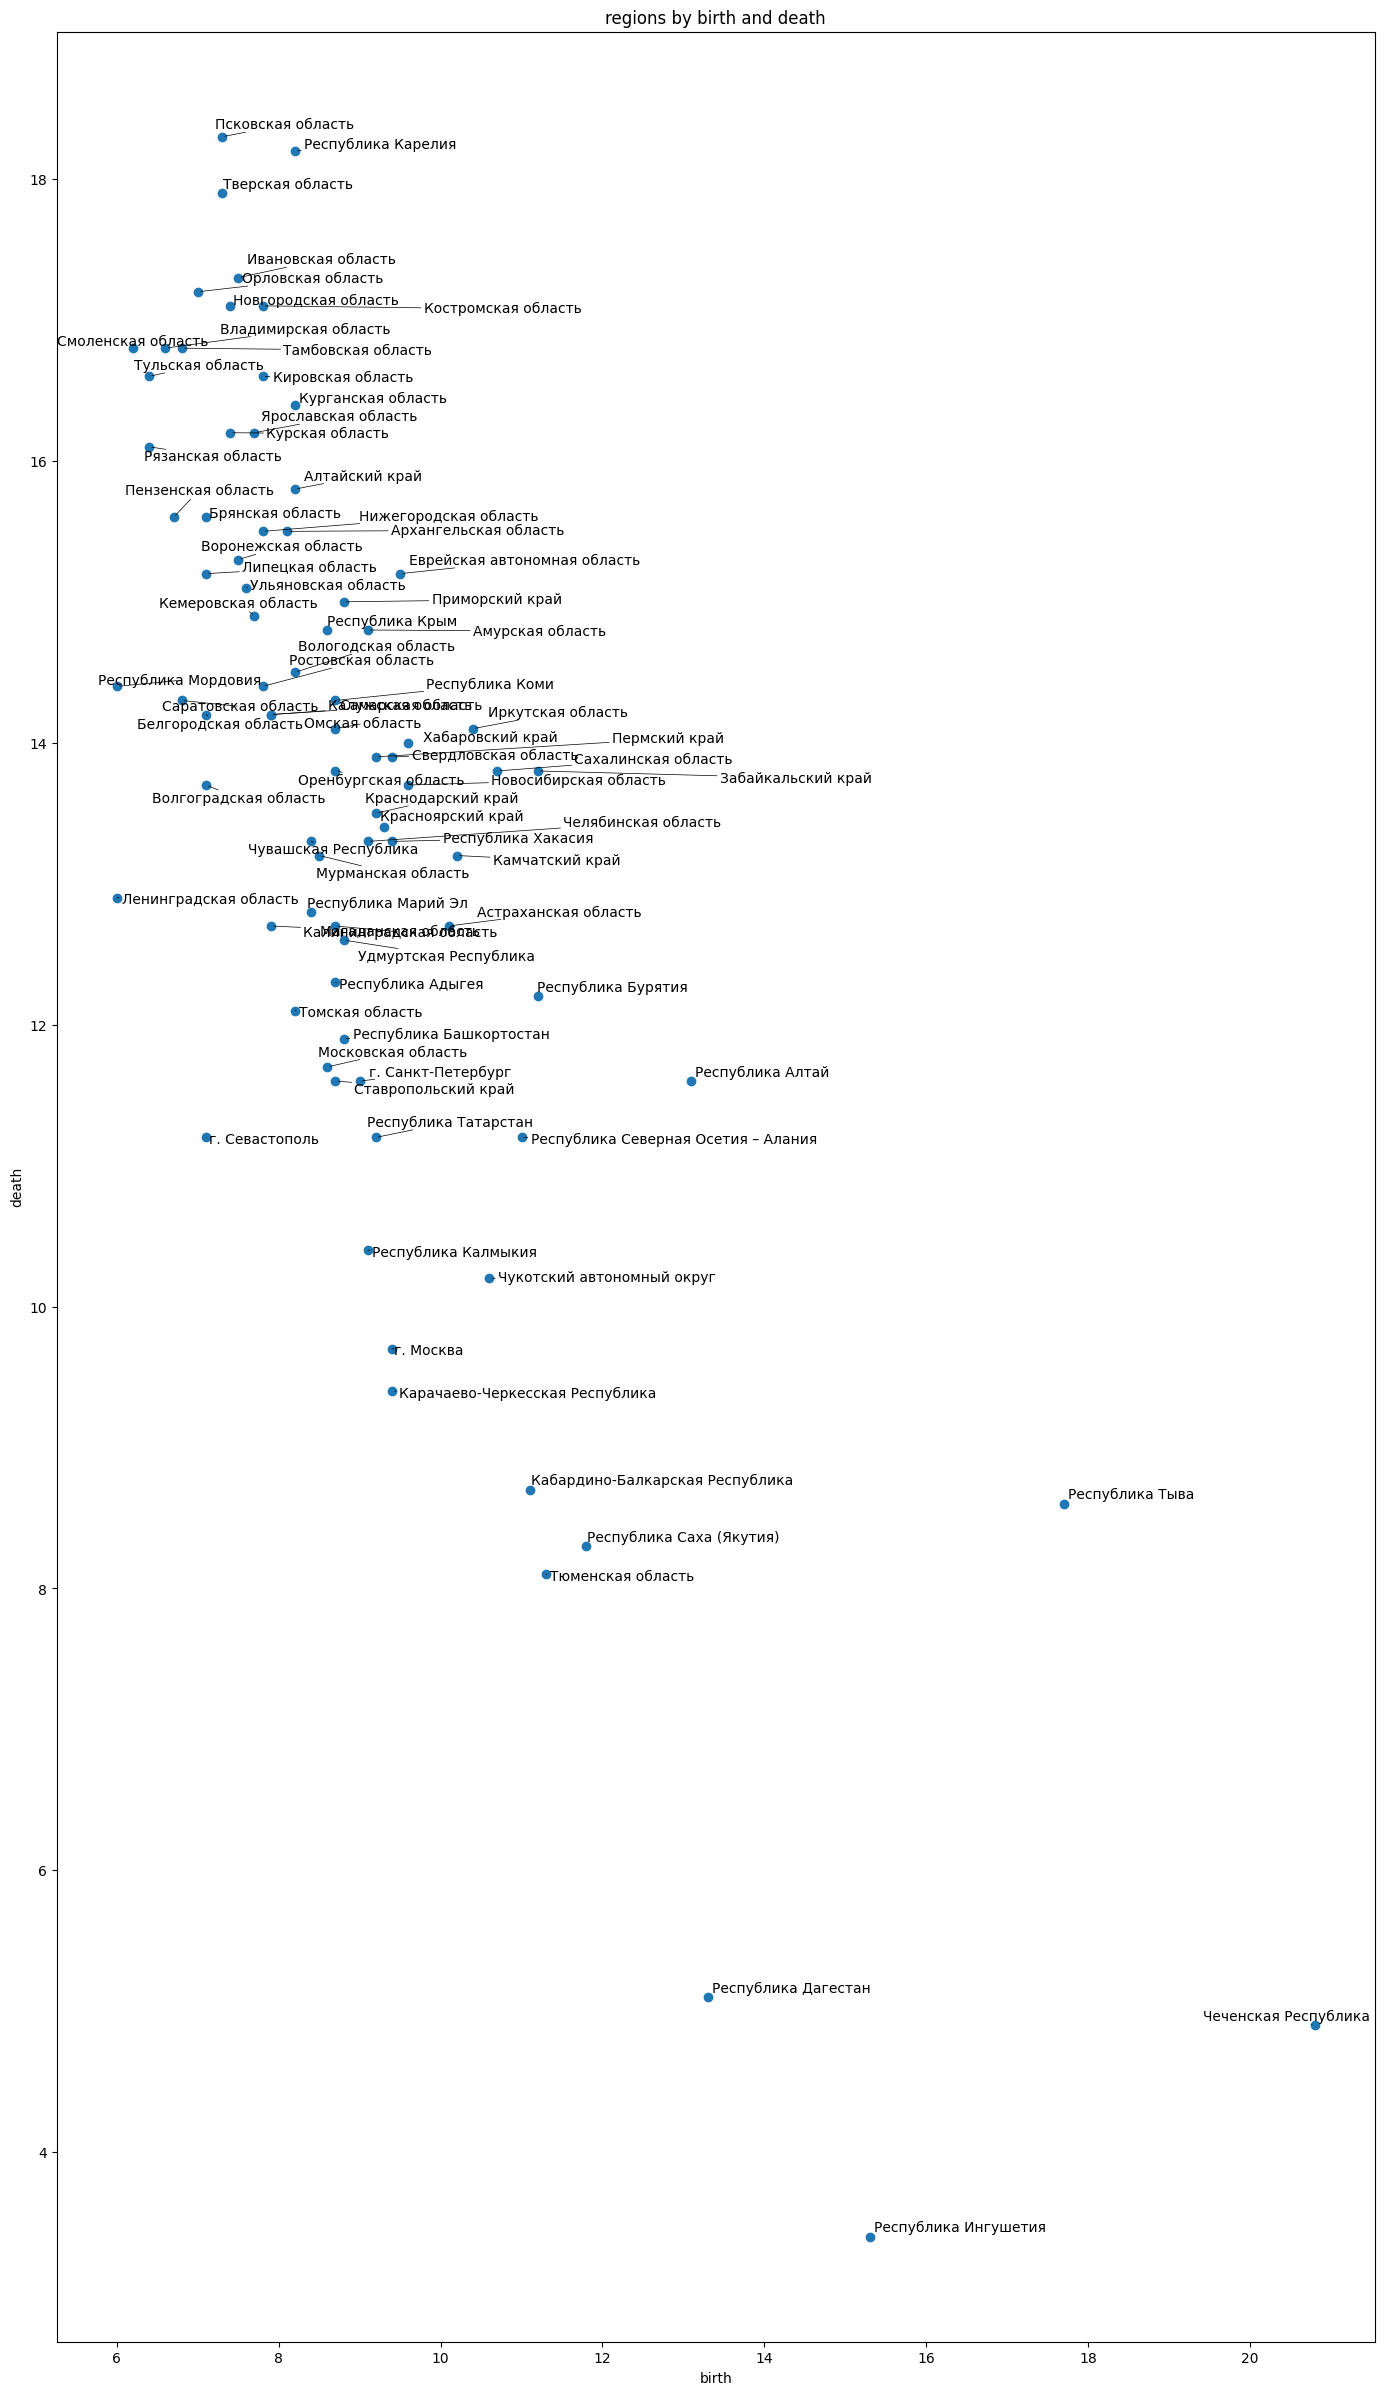

In [5]:
plt.figure(figsize=(17, 30))
plt.scatter(scaled_data['birth'], scaled_data['death'])
texts = []
for i, txt in enumerate(scaled_data.index):
   texts.append(plt.annotate(txt, (scaled_data['birth'][i], scaled_data['death'][i])))
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black', lw=0.5)) #arrowprops добавляет стрелки
plt.xlabel('birth')
plt.ylabel('death')
plt.title('regions by birth and death')
plt.show()

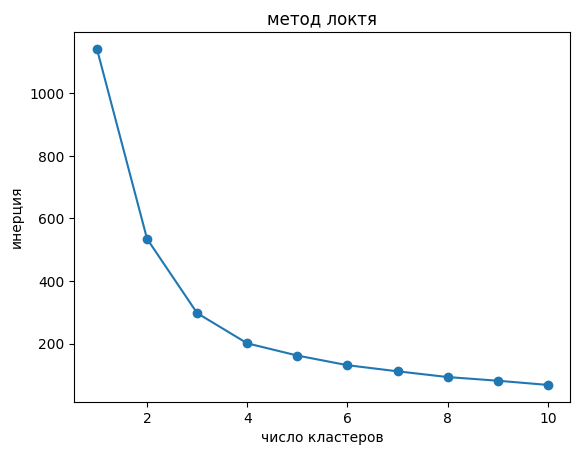

In [6]:
inert = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    inert.append(kmeans.inertia_)

plt.plot(range(1, 11), inert, marker='o')
plt.title('метод локтя')
plt.xlabel('число кластеров')
plt.ylabel('инерция')
plt.show()

In [7]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
labels = kmeans.labels_

In [8]:
sil = silhouette_score(scaled_data, labels)
db = davies_bouldin_score(scaled_data, labels)

In [9]:
data['cluster'] = labels
data.head()

,birth,death,cluster
region,,,
Белгородская область,7.1,14.2,0
Брянская область,7.1,15.6,0
Владимирская область,6.6,16.8,0
Воронежская область,7.5,15.3,0
Ивановская область,7.5,17.3,0


/var/folders/63/rt5b9p_52bg2qd8w4hd3t1_00000gn/T/ipykernel_51235/2217682349.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  texts.append(plt.annotate(txt, (scaled_data['birth'][i], scaled_data['death'][i])))


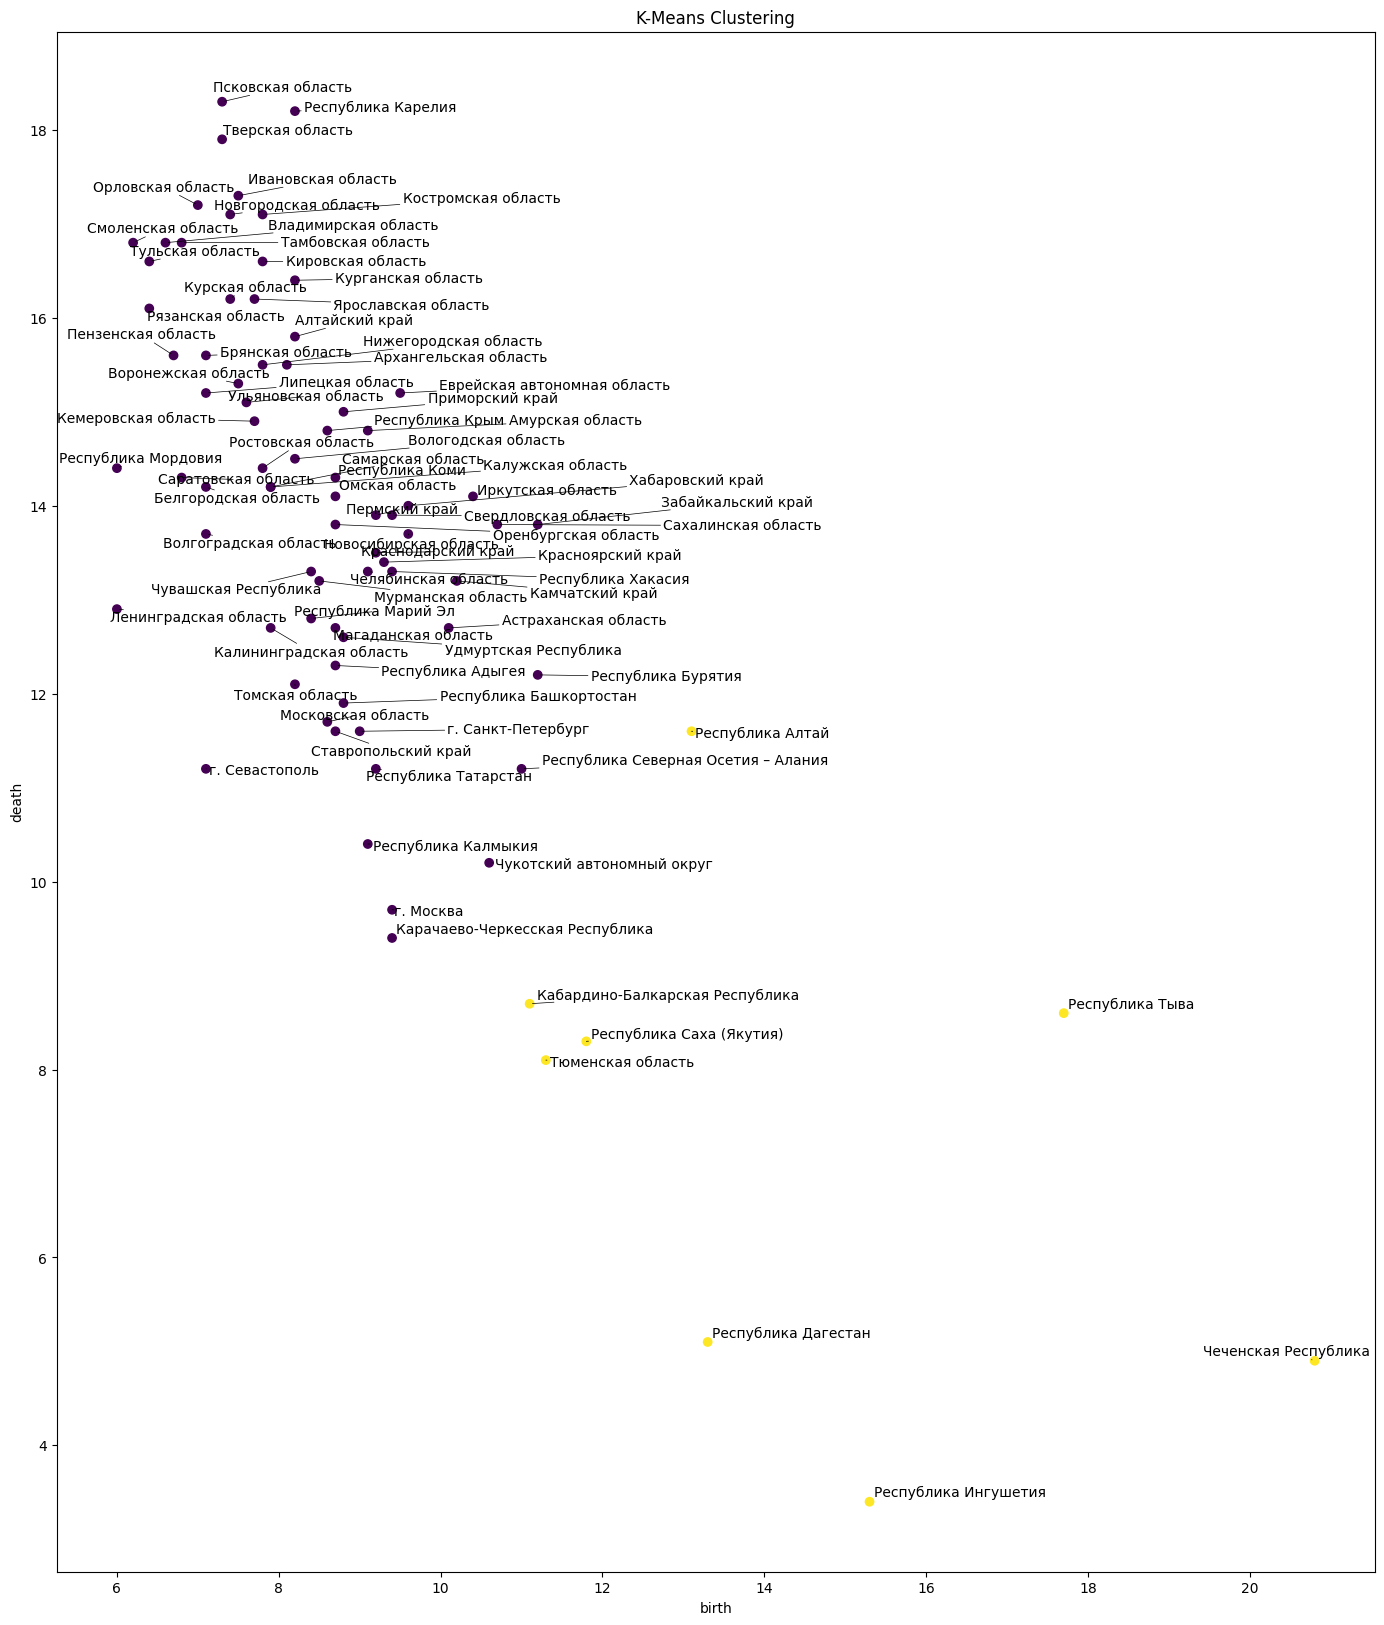

In [10]:
plt.figure(figsize=(17, 20))
plt.scatter(scaled_data['birth'], scaled_data['death'], c=labels, cmap='viridis')
texts = []

for i, txt in enumerate(scaled_data.index):
    texts.append(plt.annotate(txt, (scaled_data['birth'][i], scaled_data['death'][i])))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black', lw=0.5))
plt.xlabel('birth')
plt.ylabel('death')
plt.title('K-Means Clustering')
plt.show()

In [11]:
print(f"Silhouette Coefficient: {sil}")
print(f"Davies-Bouldin Index: {db}")

Silhouette Coefficient: 0.6387239298064071
Davies-Bouldin Index: 0.6535550930772024


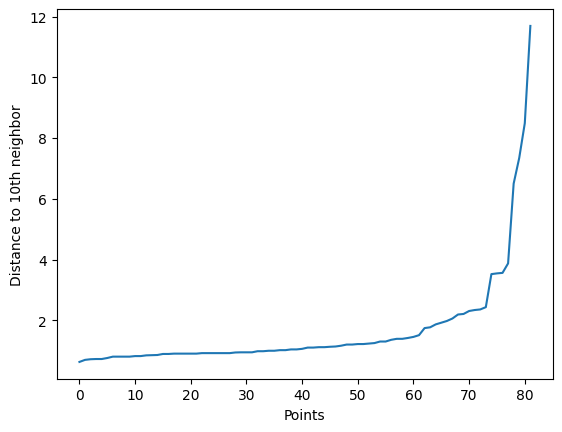

In [12]:
from sklearn.neighbors import NearestNeighbors

X = scaled_data # ваши данные
knn = NearestNeighbors(n_neighbors=10) # 10 ближайших соседей
knn.fit(X)
distances, indices = knn.kneighbors(X)
distances = np.sort(distances[:, -1]) #берем максимальное расстояние до 10-го соседа
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Distance to 10th neighbor')
plt.show()


In [18]:
dbscan = DBSCAN(eps=2.5, min_samples=3)
dbscan.fit(scaled_data)
labels = dbscan.labels_


In [19]:
data['cluster'] = labels

/var/folders/63/rt5b9p_52bg2qd8w4hd3t1_00000gn/T/ipykernel_51235/599498818.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  texts.append(plt.annotate(txt, (scaled_data['birth'][i], scaled_data['death'][i])))


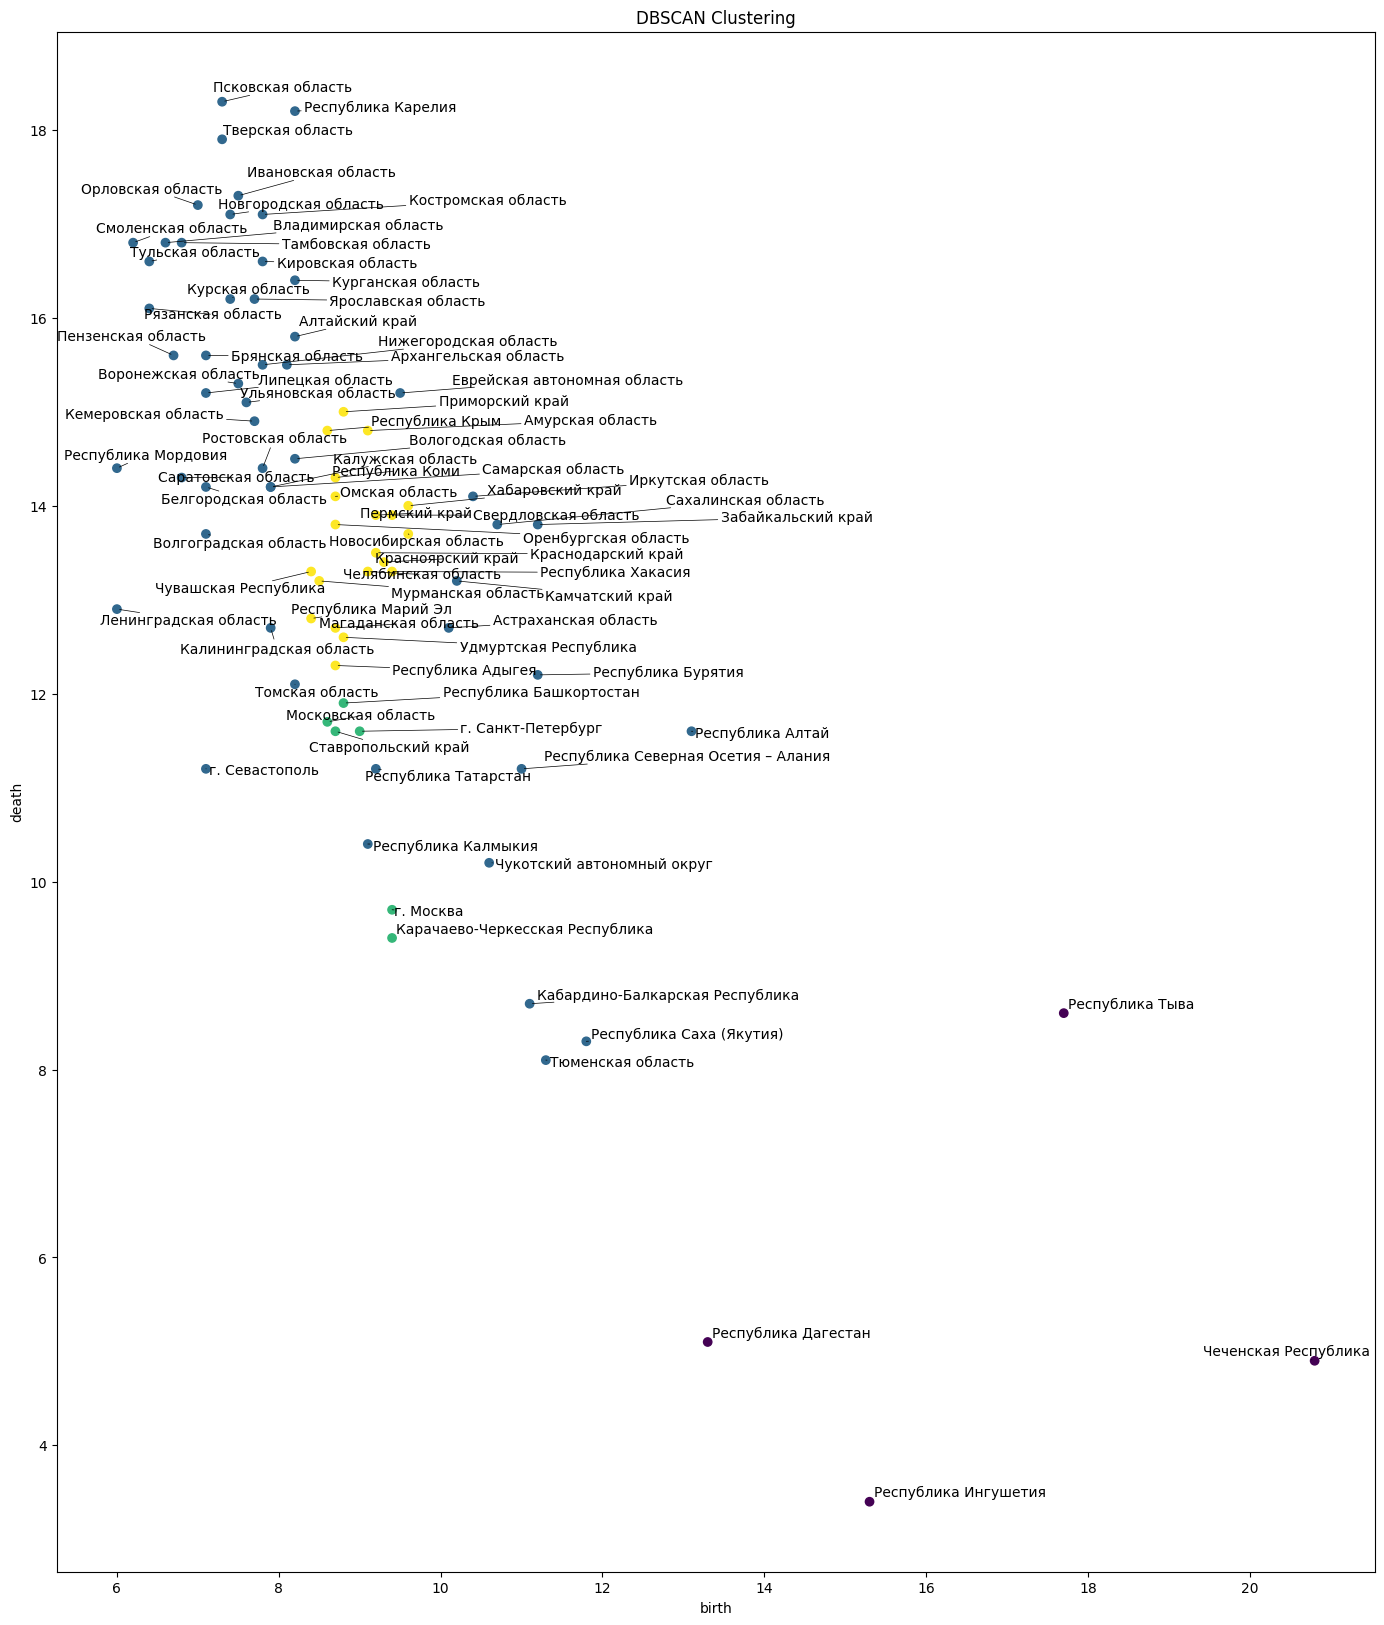


Шумовые точки:
                       birth  death  cluster
region                                      
Республика Дагестан     13.3    5.1       -1
Республика Ингушетия    15.3    3.4       -1
Чеченская Республика    20.8    4.9       -1
Республика Тыва         17.7    8.6       -1


In [20]:
plt.figure(figsize=(17, 20))
plt.scatter(scaled_data['birth'], scaled_data['death'], c=labels, cmap='viridis')
texts = []

for i, txt in enumerate(scaled_data.index):
    texts.append(plt.annotate(txt, (scaled_data['birth'][i], scaled_data['death'][i])))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black', lw=0.5))
plt.xlabel('birth')
plt.ylabel('death')
plt.title('DBSCAN Clustering')
plt.show()

noise = data[data['cluster'] == -1]
print("\nШумовые точки:")
print(noise)

In [22]:
try:
    silhouette_avg = silhouette_score(scaled_data, labels)
    print(f"Silhouette Coefficient: {silhouette_avg}")
except ValueError:
    print("Silhouette Coefficient is undefined for DBSCAN with this configuration.")

db_index = davies_bouldin_score(scaled_data, labels)
print(f"Davies-Bouldin Index: {db_index}")

Silhouette Coefficient: 0.17836651491035005
Davies-Bouldin Index: 1.1256895340545023


In [17]:
data.corr()

,birth,death,cluster
birth,1.000000,-0.757987,-0.107690
death,-0.757987,1.000000,0.082079
cluster,-0.107690,0.082079,1.000000
